# Homework 2 Problem 3


In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [214]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

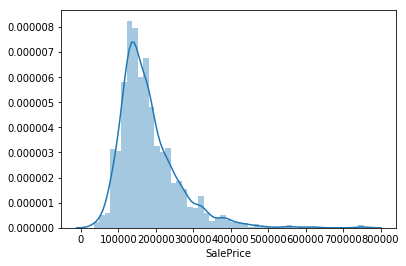

In [215]:
sns.distplot(train['SalePrice']);
plt.savefig("SalePrice")

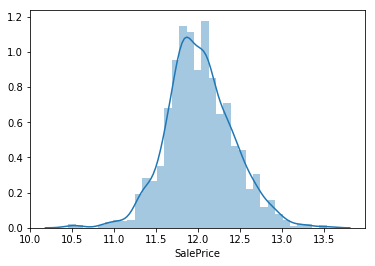

In [216]:
# Fill in your code for transformation
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot(train['SalePrice'])
plt.savefig("logSalePrice")

### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

#### Filling with Nan Values with the mean of the columns

In [217]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.634603
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,11.678440


In [218]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [219]:
trainmean=train.fillna(value=train.mean())

In [220]:
trainmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [221]:
sum(trainmean.isnull().sum()!=0)

16

In [222]:
dummiestrain = pd.get_dummies(trainmean)
dummiestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(4), int64(34), uint8(252)
memory usage: 792.8 KB


In [223]:
dummiestrain.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [224]:
dummiestrain = dummiestrain.loc[:, (dummiestrain != 0).any(axis=0)]

In [225]:
dummiestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(4), int64(34), uint8(252)
memory usage: 792.8 KB


In [226]:
testmean=test.fillna(value=train.mean())

In [227]:
sum(testmean.isnull().sum()!=0)

22

### Creating dummies for categorical variables 

In [228]:
dummiestest = pd.get_dummies(testmean)
dummiestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(234)
memory usage: 755.2 KB


In [229]:
Y=dummiestrain['SalePrice']

In [230]:
Y=Y.drop(Y.index[0])

In [231]:
Y.head(10)

1     12.109011
2     12.317167
3     11.849398
4     12.429216
5     11.870600
6     12.634603
7     12.206073
8     11.774520
9     11.678440
10    11.771436
Name: SalePrice, dtype: float64

In [232]:
dummiestrain=dummiestrain.drop(dummiestrain.index[0])

In [233]:
dummiestrain=dummiestrain.drop(['Id','SalePrice'], axis=1)

In [234]:
dummiestrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0


In [235]:
dummiestrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(252)
memory usage: 780.8 KB


In [236]:
dummiestest=dummiestest.drop(['Id'], axis=1)

In [237]:
dummiestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(234)
memory usage: 743.8 KB


In [238]:
dummiestest.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [239]:
missingcolumns= set(dummiestrain.columns)-set(dummiestest.columns)
for i in missingcolumns:
    dummiestest[i]=0
dummiestest=dummiestest[dummiestrain.columns]

In [240]:
dummiestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(43), uint8(234)
memory usage: 949.0 KB


### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


[0.31819312056624005, 0.31755469819420368, 0.31564694751693512, 0.31280742192953559, 0.30996189472801905, 0.30855717015562067, 0.30650934648432387, 0.30519947850187351, 0.30270609294624518, 0.3006518911458515, 0.29890699493224526]
Minimum most value of mse is 0.298906994932 for alpha value 75


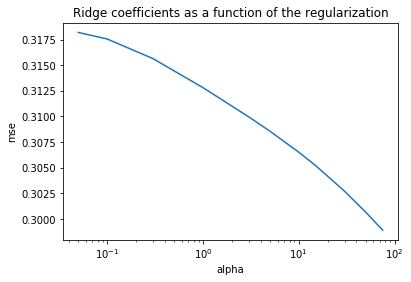

In [243]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

ridge=Ridge()
mse=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(dummiestrain, Y)
    Predict=ridge.predict(dummiestest)
    mse.append(np.mean(mean_squared_error(Y,Predict)))
    

print(mse)
Minimummost=mse.index(min(mse))
Minimummse=min(mse)
Avalue=alphas[Minimummost]
print('Minimum most value of mse is %s for alpha value %s' %(Minimummse,Avalue))
axis=plt.gca()
axis.plot(alphas, mse)
axis.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Ridge coefficients as a function of the regularization');
plt.savefig("Ridge coefficients as a function of the regularization.png")


### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


[0.28374235877477255, 0.28159685760809716, 0.27744093535696107, 0.26580548946152732, 0.25101062424582182, 0.2454986191440735, 0.23559102751218106, 0.22691162300150647, 0.20792717966899299, 0.1905217833333121, 0.17589338070448687]
Minimum most value of mse is 0.175893380704 for alpha value 75


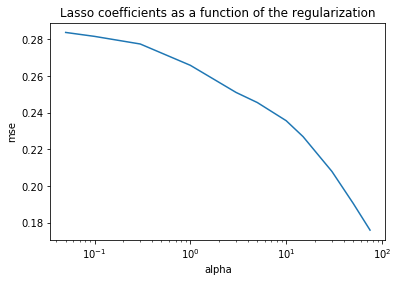

In [244]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

lasso=Lasso()
mse=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(dummiestrain, Y)
    Predict=lasso.predict(dummiestest)
    mse.append(np.mean(mean_squared_error(Y,Predict)))
    

print(mse)
Minimummost=mse.index(min(mse))
Minimummse=min(mse)
Avalue=alphas[Minimummost]
print('Minimum most value of mse is %s for alpha value %s' %(Minimummse,Avalue))
axis=plt.gca()
axis.plot(alphas, mse)
axis.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Lasso coefficients as a function of the regularization');
plt.savefig("Lasso coefficients as a function of the regularization.png")


### Selecting Best Tuning Parameter, Comparing CV Error, Prediction

Please use cross-validation to choose the best tuning parameter for both methods. Please compare the cross-validation error (mean of the Residual Mean Square Error for different replications). Please apply the model on the testing dataset. Since the label is not provided, you don't need to compute the testing performance, only the prediction is good enough.

In [210]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error',store_cv_values=True)
Ridge_1= ridgecv.fit(dummiestrain, Y)
print(Ridge_1.alpha_)

Ridge_A=Ridge()
Ridge_A.set_params(alpha=Ridge_1.alpha_)
Ridge_A.fit(dummiestrain, Y)
Predict_2=Ridge_A.predict(dummiestest)
print(mean_squared_error(Y,Predict_2))

10.0
0.306509346484


In [211]:
lassocv = LassoCV(alphas=alphas)
Lasso_1= lassocv.fit(dummiestrain, Y)
print(Lasso_1.alpha_)

Lasso_A=Lasso(alpha=Lasso_1.alpha_)
Lasso_A.fit(dummiestrain, Y)
Predict_2L=Lasso_A.predict(dummiestest)
print(mean_squared_error(Y,Predict_2L))

0.05
0.283742358775


In [245]:
#Prediction of the Test dataset through Lasso
Prediction=Lasso_A.predict(dummiestest)
Prediction

array([ 11.84461032,  11.8848263 ,  12.16662403, ...,  12.09224462,
        11.72875786,  12.36048755])